In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [3]:
data_new = pd.read_csv('../Data/uk_collideoscope/collideoscope.csv', parse_dates=['Created','Confirmed'])
data_old = pd.read_csv('../Data/uk_collideoscope/cycling_safety_uk_collideoscope.csv', usecols=data_new.columns, parse_dates=['Created','Confirmed'])

/var/folders/vr/db_lr4m5259c_7ffjy_3pysh0000gn/T/ipykernel_9295/2528030227.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data_old = pd.read_csv('../Data/uk_collideoscope/cycling_safety_uk_collideoscope.csv', usecols=data_new.columns, parse_dates=['Created','Confirmed'])


In [10]:
print(len(data_old))
print(len(data_new))
data = pd.concat([data_old, data_new])
print(len(data))
data.drop_duplicates(inplace=True)
print(len(data))
data.reset_index(inplace=True)
data.drop(columns='index', inplace=True)
data.sample(5)

100048
2204
102252
100791


,Report ID,Title,Category,Created,Confirmed,Latitude,Longitude,Participants
5381,114112,Slight incident involving a bicycle and a vehicle,vehicle-slight,2017-09-25 16:30:00,2017-09-25 16:30:00,51.456651,-0.372809,car
21494,104599,Slight incident involving a bicycle and a vehicle,vehicle-slight,2016-11-16 08:45:00,2016-11-16 08:45:00,51.483345,0.356332,car
72915,62603,Slight incident involving a bicycle and a vehicle,vehicle-slight,2014-05-20 21:28:00,2014-05-20 21:28:00,52.283174,-1.546752,car
45670,80358,Slight incident involving a bicycle and a vehicle,vehicle-slight,2015-08-17 16:00:00,2015-08-17 16:00:00,53.811458,-1.542342,car
42181,76382,Slight incident involving a bicycle and a vehicle,vehicle-slight,2015-10-13 18:40:00,2015-10-13 18:40:00,51.442109,-0.387736,bus


In [5]:
data['fatal']= 0
data['serious']= 0
data['slight']= 0
data['miss']= 0

data.loc[data['Category'] == 'vehicle-fatal', 'fatal'] = 1
data.loc[data['Category'] == 'bicycle-fatal', 'fatal'] = 1
data.loc[data['Category'] == 'pedestrian-fatal', 'fatal'] = 1
data.loc[data['Category'] == 'horse-fatal', 'fatal'] = 1
data.loc[data['Category'] == 'generic-fatal', 'fatal'] = 1

data.loc[data['Category'] == 'vehicle-serious', 'serious'] = 1
data.loc[data['Category'] == 'bicycle-serious', 'serious'] = 1
data.loc[data['Category'] == 'pedestrian-serious', 'serious'] = 1
data.loc[data['Category'] == 'horse-serious', 'serious'] = 1
data.loc[data['Category'] == 'generic-serious', 'serious'] = 1

data.loc[data['Category'] == 'vehicle-slight', 'slight'] = 1
data.loc[data['Category'] == 'bicycle-slight', 'slight'] = 1
data.loc[data['Category'] == 'pedestrian-slight', 'slight'] = 1
data.loc[data['Category'] == 'horse-slight', 'slight'] = 1
data.loc[data['Category'] == 'generic-slight', 'slight'] = 1

data.loc[data['Category'] == 'vehicle-miss', 'miss'] = 1
data.loc[data['Category'] == 'bicycle-miss', 'miss'] = 1
data.loc[data['Category'] == 'pedestrian-miss', 'miss'] = 1
data.loc[data['Category'] == 'horse-miss', 'miss'] = 1
data.loc[data['Category'] == 'generic-miss', 'miss'] = 1

data['severity']=0
data.loc[data['fatal'] == 1, 'severity'] = 3
data.loc[data['serious'] == 1, 'severity'] = 2
data.loc[data['slight'] == 1, 'severity'] = 1
data.loc[data['miss'] == 1, 'severity'] = 0

In [54]:
data

,Report ID,Title,Category,Created,Confirmed,Latitude,Longitude,Participants,fatal,serious,slight,miss,severity
0,129720,Near miss involving a bicycle and a motor vehicle,vehicle-miss,2020-01-30 01:16:48,2020-01-30 01:17:04,51.514642,-0.028360,car,0,0,0,1,0
1,129719,Near miss involving a bicycle and a motor vehicle,vehicle-miss,2020-01-28 09:14:09,2020-01-28 09:14:09,53.400875,-2.967383,car,0,0,0,1,0
2,129718,Slight incident involving a bicycle and a moto...,vehicle-slight,2020-01-28 09:12:35,2020-01-28 09:13:26,51.530420,-0.012724,car,0,0,1,0,1
3,129716,Serious incident involving a bicycle and a mot...,vehicle-serious,2020-01-18 21:01:40,2020-01-18 21:02:07,55.857660,-3.184823,other,0,1,0,0,2
4,129715,Near miss involving a bicycle and a motor vehicle,vehicle-miss,2020-01-18 15:46:09,2020-01-18 15:46:48,53.656733,-2.965897,car,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100786,49352,Slight incident involving a bicycle and a vehicle,vehicle-slight,2014-10-08 20:46:02,2014-10-08 20:46:45,53.502944,-2.310292,car,0,0,1,0,1
100787,49349,Near miss involving a bicycle and a vehicle,vehicle-miss,2014-10-08 14:39:00,2014-10-08 14:44:04,51.492288,-0.125468,motorcycle,0,0,0,1,0
100788,49347,Near miss involving a bicycle and a vehicle,vehicle-miss,2014-10-08 13:42:16,2014-10-08 13:43:47,52.619749,1.246717,car,0,0,0,1,0
100789,49342,Slight incident involving a bicycle and a vehicle,vehicle-slight,2014-10-07 21:00:47,2014-10-07 21:01:23,51.415926,-0.186228,car,0,0,1,0,1


In [55]:
print('Accidents between '+str(data['Confirmed'].min())+' and '+str(data['Confirmed'].max()))

total_accidents = data.shape[0]
print("There are a total of "+str(total_accidents)+" accidents.")

fatalities = data['fatal'].sum()
print("There are a total of "+str(fatalities)+" fatalities.")

serious_injuries = data['serious'].sum()
print("There are a total of "+str(serious_injuries)+" seriously injured.")

injuries = data['slight'].sum()
print("There are a total of "+str(injuries)+" slightly injured.")

miss = data['miss'].sum()
print("There are a total of "+str(miss)+" missed.")

bicycles = data.shape[0]
print("There are a total of "+str(bicycles)+" bicycles involved in all the accidents.")

Accidents between 2013-01-01 00:30:00 and 2021-03-05 16:46:14
There are a total of 100791 accidents.
There are a total of 571 fatalities.
There are a total of 17671 seriously injured.
There are a total of 80221 slightly injured.
There are a total of 2328 missed.
There are a total of 100791 bicycles involved in all the accidents.


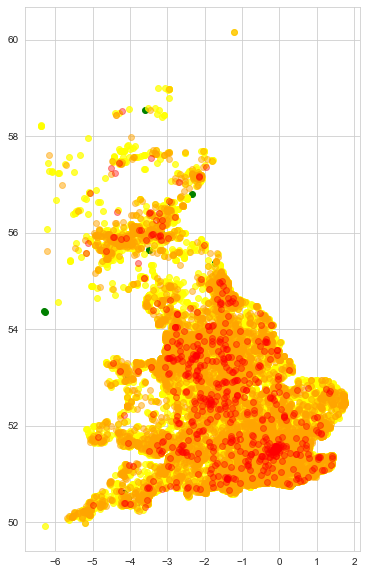

In [8]:
plt.figure(figsize=(6,10))

colors=['green','yellow','orange','red']
alphas=[1, 0.75, 0.5, 0.4]

for severity, df in data.groupby('severity'):
    plt.scatter(df.Longitude, df.Latitude, color=colors[severity], alpha=alphas[severity])
    
plt.show()

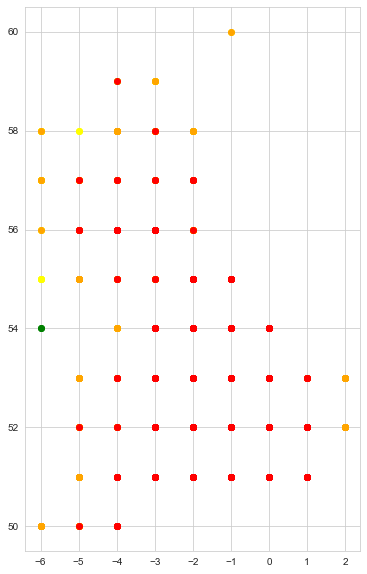

In [70]:
plt.figure(figsize=(6,10))

colors=['green','yellow','orange','red']

for severity, df in data.groupby('severity'):
    plt.scatter(np.round(df.Longitude,0), np.round(df.Latitude, 0), color=colors[severity])
    
plt.show()

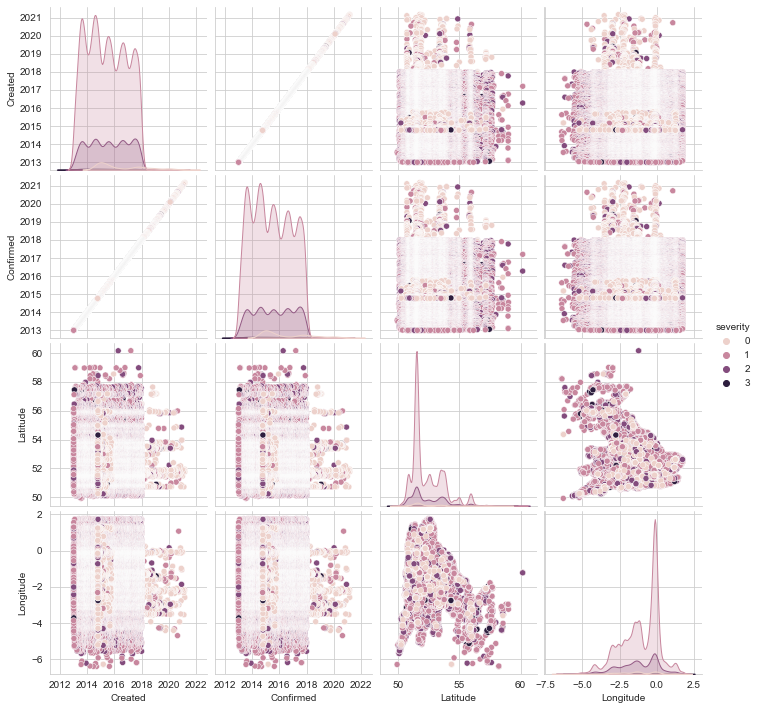

In [64]:
sns.pairplot(data = data,
                x_vars = ['Created', 'Confirmed', 'Latitude', 'Longitude'],
                y_vars = ['Created', 'Confirmed', 'Latitude', 'Longitude'],
                hue = 'severity')

plt.show()

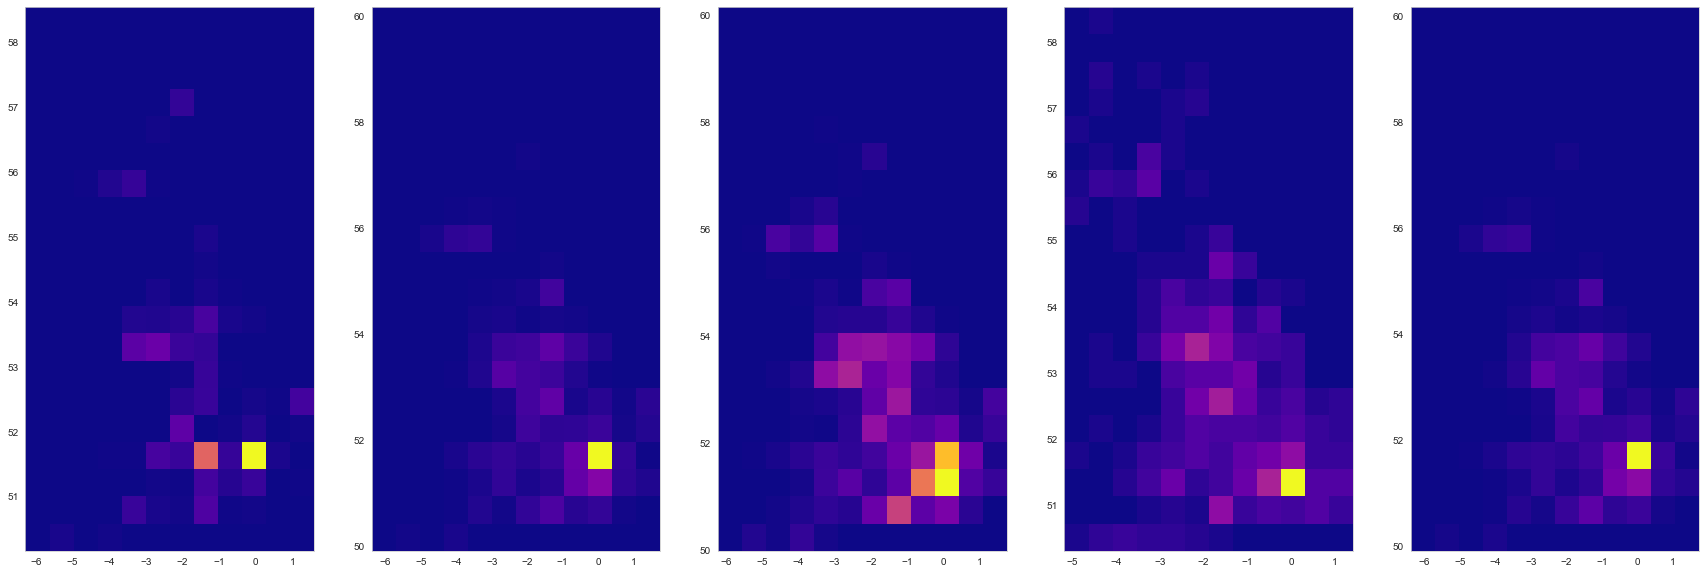

In [83]:
fig, ax = plt.subplots(1, 5, figsize=(6,10))
fig.set_figheight(10)
fig.set_figwidth(30)

for severity, df in data.groupby('severity'):
    ax[severity].hist2d(df.Longitude, df.Latitude, bins=(12, 20), cmap='plasma')
    
ax[4].hist2d(data.Longitude, data.Latitude, bins=(12, 20), weights=data.severity, cmap='plasma')
 
plt.show()